# Filippo Conforto - RLab 07

### Functions and libraries

In [39]:
library(tidyverse, quiet = TRUE)
library(latex2exp)

In [3]:
find_ci95 = function (pos) {
    low = uniroot(function(y){integrate(pos,0,y)[[1]] - 0.025}, lower = 0, upper = 1)$root
    up = uniroot(function(y){integrate(pos,y,1)[[1]] - 0.025}, lower = 0, upper = 1)$root
    return(c(low,up))
}

In [4]:
s_dec <- function(x, k) trimws(format(round(x, k), nsmall=k))

## Exercise 1

### A
The number of times the new method fails to detect the disease is clearly the result of a success/failure process, and so it can be described by a binomial distribution with as parameter the probability to not detect the disease.

### B
The frequentist estimator for the main parameter of the binomial distribution is obtained simply as the frequency of failures: $\frac{6}{75}$

### C
Starting from a beta prior with parameters $\alpha_0$, $\beta_0$ is possible to estimate the final posterior as a beta function updated using the given data. Starting from the prior mean ($\mu$) and variance ($\sigma^2$) is possible to estimate the parameters as: 

$$ \alpha_0 = (\frac{1-\mu}{\sigma^2}-\frac{1}{\mu})\mu^2 \quad \beta_0 = \alpha_0(\frac{1}{\mu} -1) $$
$$\alpha_1 = \alpha_0 + \#failures \quad \beta_1 = \beta_0 + \#attempts - \#failures$$



In [78]:
alfa = ((1-0.15)/0.14^2-1/0.15)*0.15^2
beta = alfa*(1/0.15 - 1)
alfa2 = alfa + 6
beta2 = beta + 69
prior = function(x) dbeta(x,shape1 = alfa, shape2 = beta)
posterior = function(x) dbeta(x,shape1 = alfa2, shape2 = beta2)

For a beta distribution mean and variance are calculated as:

$$ \mu = \frac{\alpha}{\alpha + \beta} \quad \sigma^2 =\frac{\alpha \beta}{(\alpha^2 +\beta^2)(\alpha+\beta+1)}$$

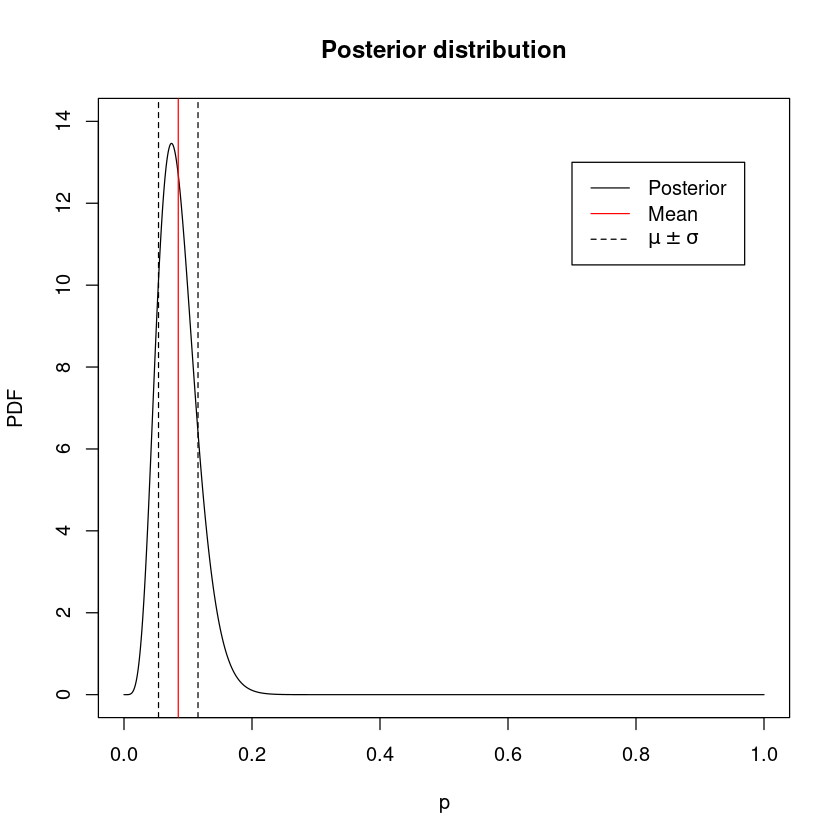

In [82]:
mean =  (alfa2)/(alfa2 + beta2)
variance = (alfa2)*(beta2)/(((alfa2+ beta2)^2)*(alfa2 + beta2+1))
plot(seq(0,1,0.001),posterior(seq(0,1,0.001)), t = "l", main = "Posterior distribution", xlab = "p", ylab = "PDF", ylim=c(0,14))
abline (v=mean,col=rgb(1,0,0, alpha = 1))
abline (v=mean-sqrt(variance),col=rgb(0,0,0, alpha = 1), lty = 2)
abline (v=mean+sqrt(variance),col=rgb(0,0,0, alpha = 1),lty =2)

legend(0.7,13,legend=c("Posterior", "Mean", TeX('$\\mu \\pm \\sigma$')),
       col=c("black", "red", "black"), lty=c(1,1,2) )

In [30]:
message("The posterior mean is " , s_dec(mean,4))
message("The posterior variance is ", s_dec(variance,4)) 

The posterior mean is 0.0848

The posterior variance is 0.0010



### D

The bayesian frequentist test for this experiment must be done as one-sided as the hypothesis is that the new test is better than the old one. So, by calculating the probability that the new test has a worse false positive rate than the old one is possible to actually test the hypothesis.

In [7]:
message("The integral for p>0.15 using the previous posterior is ",s_dec(pbeta(0.15,shape1 = alfa2, shape2 = beta2, lower.tail = FALSE)*100,2),
        "%, so is possible to reject the null hypothesis with a significance level of 5%.")

The integral for p>0.15 using the previous posterior is 3.13%, so is possible to reject the null hypothesis with a significance level of 5%.



### E

In the frequentist context the p-value is obtained as the the cumulative probability to get a number of successes (or in this case failures) up to the number found. 

In [8]:
message("The p-value obtained is ",s_dec(pbinom(6,75,0.15)*100,2),
        "%, so is not possible to reject the null hypothesis with a significance level of 5%.")


The p-value obtained is 5.44%, so is not possible to reject the null hypothesis with a significance level of 5%.



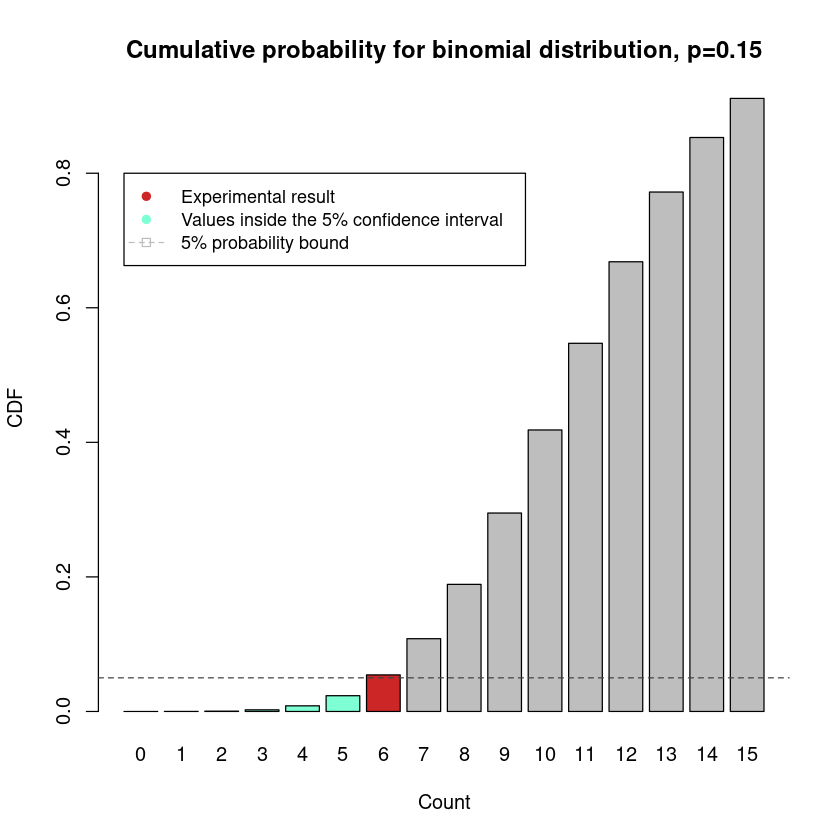

In [9]:
barplot(pbinom(seq(0,15,1),75,0.15), name = seq(0,15,1), col = c(rep("aquamarine",6),"firebrick3",rep("grey",13)), xlab = "Count",ylab="CDF", main="Cumulative probability for binomial distribution, p=0.15")
abline(h=0.05, col= "gray27", lty =2)

legend(0.2,0.8,legend=c("Experimental result","Values inside the 5% confidence interval","5% probability bound"),
       col=c("firebrick3", "aquamarine", "grey"), lty=c(0,0,2), cex = 0.9, pch= c(19,19,0))

This time the result is different and is not possible to exclude the null hypothesis.

## Exercise 2

Since this problem concerns the inference over the $\lambda$ parameter, the final posterior must be a gamma function with parameters 
$$\alpha =  \sum_i x_i * \#observations_i+\alpha_0 +1 \quad \beta = \#observations +\beta_0$$
where $x_i$ are the observed values.

### A

A uniform prior has no effect on the final gamma function, so the parameters $\alpha_0$ and $\beta_0$ are fixed to 0.

In [83]:
posterior1 = function(x){
    dgamma(x,123,200)
}
posterior2 = function(x){
    dgamma(x,197,280)
}

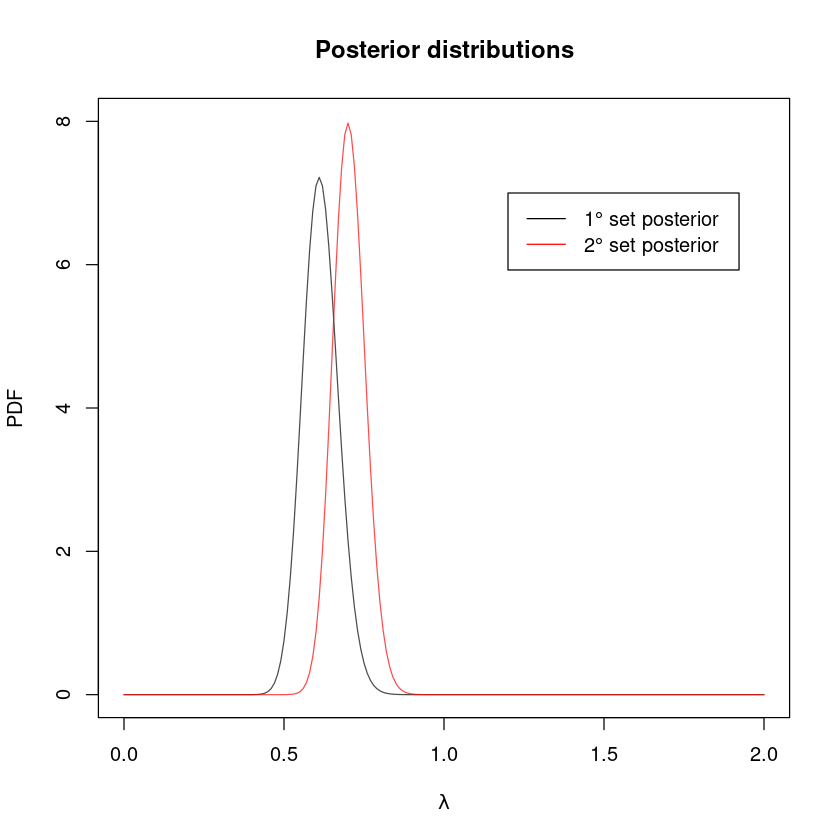

In [84]:
plot(seq(0,2,0.01), posterior1(seq(0,2,0.01)),
     t = "l", main = "Posterior distributions",
     xlab = expression(lambda), ylab = "PDF", ylim = c(0,8),
     col = rgb(0,0,0, alpha=0.7))
lines(seq(0,2,0.01), posterior2(seq(0,2,0.01)),
      lty = 1, col = rgb(1,0,0, alpha=0.7))

legend(1.2,7,legend=c("1° set posterior", "2° set posterior"),
       col=c("black", "red"), lty=c(1,1,2) )

In [12]:
message("The posterior mean using the first observation set is ", s_dec(123/200,3))
message("The posterior mean using the second observation set is ", s_dec(197/280,3))
message("The posterior median using the first observation set is ", s_dec(qgamma(0.5,123,200),3))
message("The posterior median using the second observation set is ", s_dec(qgamma(0.5,197,280),3))
message("The posterior variance using the first observation set is ",s_dec(123/200^2,3))
message("The posterior variance using the second observation set is ",s_dec(197/280^2,3))
message("The 95% credibility interval for the first observation set is ["
        ,s_dec(find_ci95(posterior1)[[1]],2),",",s_dec(find_ci95(posterior1)[[2]],2),"]")
message("The 95% credibility interval for the second observation set is ["
        ,s_dec(find_ci95(posterior2)[[1]],2),",",s_dec(find_ci95(posterior2)[[2]],2),"]")

The posterior mean using the first observation set is 0.615

The posterior mean using the second observation set is 0.704

The posterior median using the first observation set is 0.613

The posterior median using the second observation set is 0.702

The posterior variance using the first observation set is 0.003

The posterior variance using the second observation set is 0.003

The 95% credibility interval for the first observation set is [0.51,0.73]

The 95% credibility interval for the second observation set is [0.61,0.81]



### B

A jeffrey prior gives a factor $\frac{1}{\sqrt{\lambda}}$, so the initial $\alpha$ parameter is shifted by $ \alpha_0 = -0.5$, while $\beta_0 =0$.

In [14]:
posterior3 = function(x){
    dgamma(x,122.5,200)
}
posterior4 = function(x){
    dgamma(x,196.5,280)
}

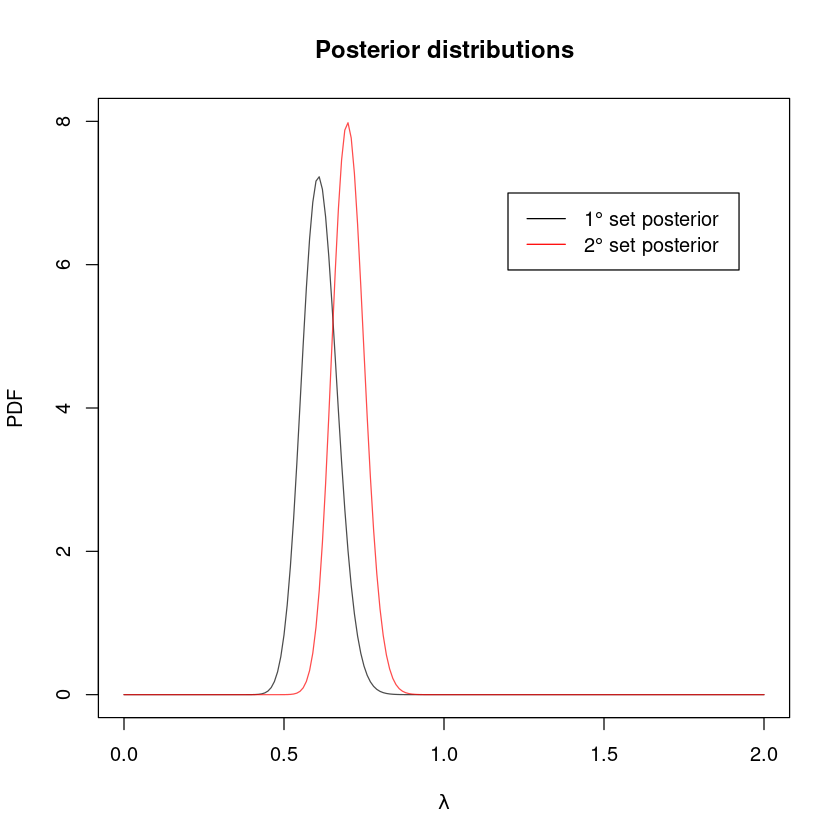

In [15]:
plot(seq(0,2,0.01), posterior3(seq(0,2,0.01)),
     t = "l", main = "Posterior distributions",
     xlab = expression(lambda), ylab = "PDF", ylim = c(0,8),
     col = rgb(0,0,0, alpha=0.7))

lines(seq(0,2,0.01), posterior4(seq(0,2,0.01)),
      lty = 1, col = rgb(1,0,0, alpha=0.7))

legend(1.2,7,legend=c("1° set posterior", "2° set posterior"),
       col=c("black", "red"), lty=c(1,1,2) )

In [16]:
message("The posterior mean using the first observation set is ", s_dec(122.5/200,3))
message("The posterior mean using the second observation set is ", s_dec(196.5/280,3))
message("The posterior median using the first observation set is ", s_dec(qgamma(0.5,122.5,200),3))
message("The posterior median using the second observation set is ", s_dec(qgamma(0.5,196.5,280),3))
message("The posterior variance using the first observation set is ",s_dec(122.5/200^2,3))
message("The posterior variance using the second observation set is ",s_dec(196.5/280^2,3))
message("The 95% credibility interval for the first observation set is ["
        ,s_dec(find_ci95(posterior3)[[1]],2),",",s_dec(find_ci95(posterior3)[[2]],2),"]")
message("The 95% credibility interval for the second observation set is ["
        ,s_dec(find_ci95(posterior4)[[1]],2),",",s_dec(find_ci95(posterior4)[[2]],2),"]")

The posterior mean using the first observation set is 0.613

The posterior mean using the second observation set is 0.702

The posterior median using the first observation set is 0.611

The posterior median using the second observation set is 0.701

The posterior variance using the first observation set is 0.003

The posterior variance using the second observation set is 0.003

The 95% credibility interval for the first observation set is [0.51,0.73]

The 95% credibility interval for the second observation set is [0.61,0.80]



## Exercise 3

This problem as the one in exercise one regards a success/failure process, in which a success can be identified as finding that a water sample has an high bacter level. The problems concerns the estimation of p for a binomial distribution.

### A

In [5]:
message("The frequentist estimator for the parameter p is simply the fraction of successes over the number of total drawns: ", s_dec(11/116,3))

The frequentist estimator for the parameter p is simply the fraction of successes over the number of total drawns: 0.095



### B

As in exercise one, the posterior is obtained as the product of two beta distribution, one depending on the data and one representing the prior. The resulting function has parameters $$\alpha_1 = \alpha_0 +\# successes \quad \beta_1 = \beta_0 + \# attempts - \#successes$$
With $ \alpha_0 = 1 \quad \beta_0 = 10 $

In [75]:
alpha_1 = 12
beta_1 = 115
posterior = function(x){
    dbeta(x,shape1 = alpha_1, shape2 = beta_1 )
}

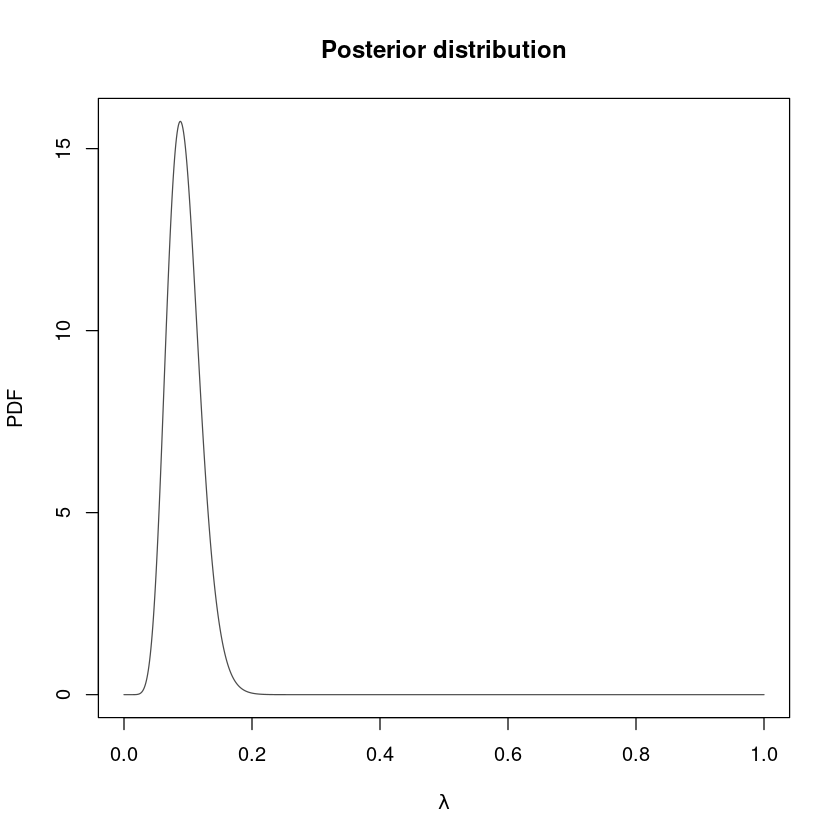

In [19]:
plot(seq(0,1,0.001), posterior(seq(0,1,0.001)),
     t = "l", main = "Posterior distribution",
     xlab = expression(lambda), ylab = "PDF",
     col = rgb(0,0,0, alpha=0.7))

### C

In [76]:
message("Using the posterior mean as an estimate for p gives p=", s_dec(alpha_1/(alpha_1 + beta_1),4))
message("The variance for the posterior distribution is ",
        s_dec((alpha_1*beta_1)/((alpha_1 + beta_1)^2*(alpha_1 +beta_1 +1)),4))
message("The 95% credibility interval for the posterior is ["
        ,s_dec(find_ci95(posterior)[[1]],2),",",s_dec(find_ci95(posterior)[[2]],2),"]")

Using the posterior mean as an estimate for p gives p=0.0945

The variance for the posterior distribution is 7e-04

The 95% credibility interval for the posterior is [0.05,0.15]



### D

This time the hypothesis testing must be two sided, since the new value of p can be both bigger or smaller than 0.1.

For the bayesian approach, by looking at the posterior is possible to see that the old value (p=0.1) is inside the symmetric 95% credibility interval, so is not possible to reject the null hypothesis.

In the frequentist approach the test is done over a binomial distribution with parameter p=0.1. If the found number of successes is inside a 95% confidence interval then the null hypothesis can't be rejected. Since the binomial is discrete is not possible to find exactly a 95% interval but only approximate it.

In [21]:
message("The interval between 6 and 18 has a total cumulative probability of "
        , s_dec(1-(pbinom(5,116,0.1)+ pbinom(18,116,0.1, lower.tail = FALSE)),3))

The interval between 6 and 18 has a total cumulative probability of 0.957



Since the number of successes (11) is inside this interval is not possible to reject the null hypothesis

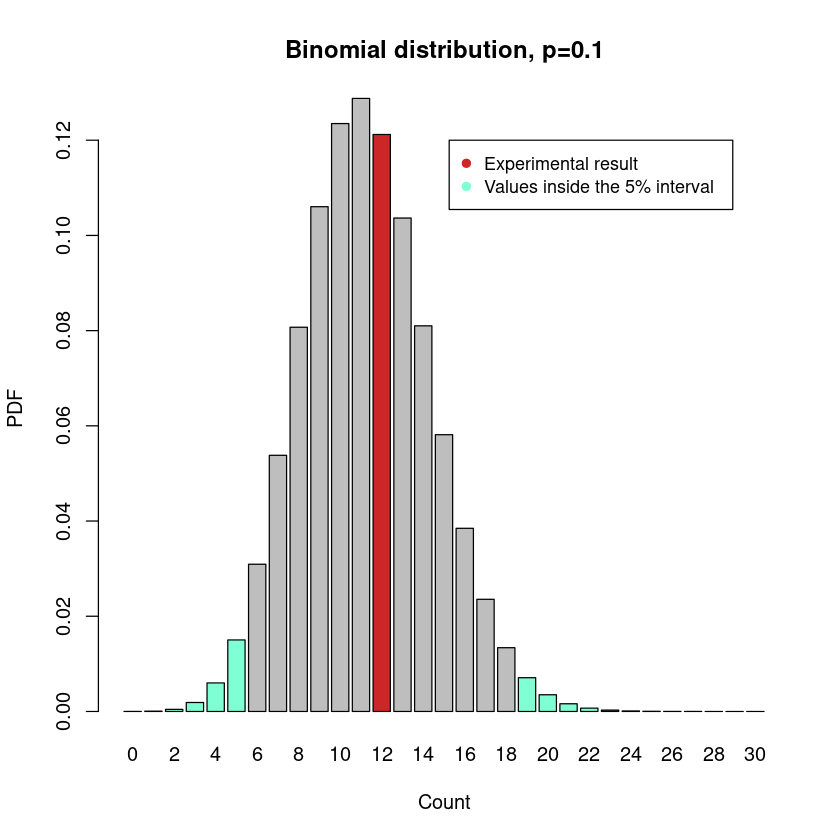

In [22]:
barplot(dbinom(seq(0,30,1),75,0.15), name = seq(0,30,1), col = c(rep("aquamarine",6),rep("grey",6),"firebrick3",rep("grey",6),rep("aquamarine",6)), xlab = "Count",ylab="PDF", main="Binomial distribution, p=0.1")

legend(19,0.12,legend=c("Experimental result","Values inside the 5% interval"),
       col=c("firebrick3", "aquamarine"), lty=c(0,0), cex = 0.9, pch= c(19,19))

### E

In [3]:
message("The frequentist estimator for the parameter p is found again as the fraction of successes over the number of total drawns: ", s_dec(9/165,3))


The frequentist estimator for the parameter p is found again as the fraction of successes over the number of total drawns: 0.055



### F

The two possible posteriors have different parameters, the firt one's can be obtained as for point B, while for the second distribution, they depend on the previous posterior. As before alpha and beta for the beta distribution can be obtained as
$$\alpha_{2_1} = \alpha_{0} + \# successes \quad \beta_{2_1} = \beta_{0} + \# attempts - \# successes$$
For the first posterior
$$\alpha_{2_2} = \alpha_1 + \# successes \quad \beta_{2_2} = \beta_1 + \# attempts - \# successes$$
For the second posterior.

In [71]:
alpha_21 = 1 + 9
beta_21 = 10 + 165 - 9
posterior1 = function(x){
    dbeta(x,shape1 = alpha_21, shape2 = beta_21 )
}
alpha_22 = 12+9
beta_22 = 115+165 -9 
posterior2 = function(x){
    dbeta(x,shape1 = alpha_22, shape2 = beta_22 )
}


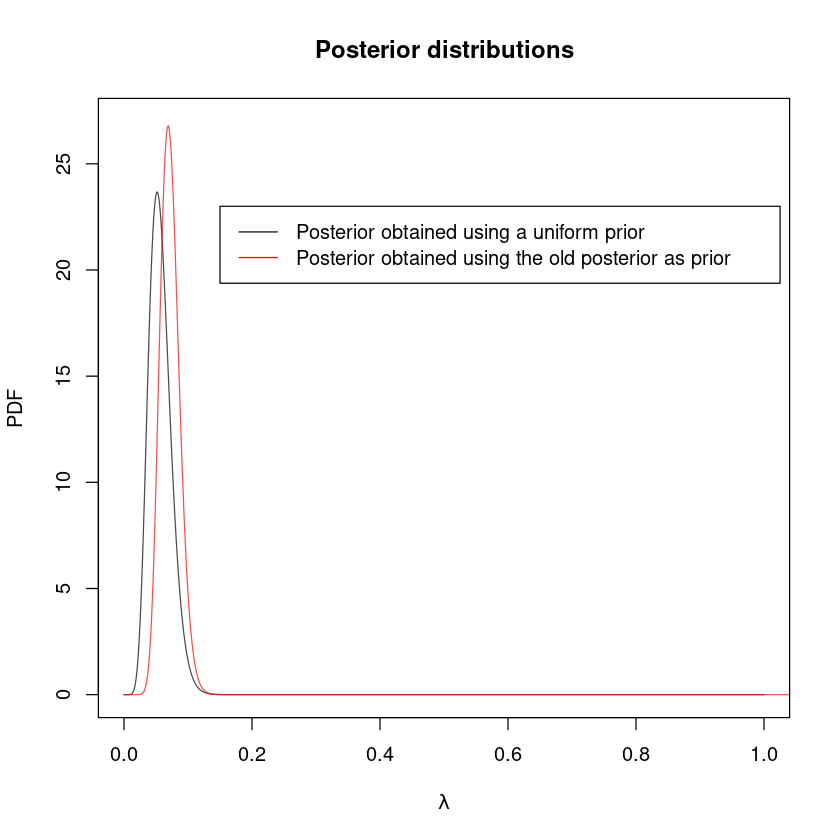

In [72]:
plot(seq(0,1,0.001), posterior1(seq(0,1,0.001)),
     t = "l", main = "Posterior distributions",
     xlab = expression(lambda), ylab = "PDF",
     col = rgb(0,0,0, alpha=0.7), ylim = c(0,27))

lines(seq(0,2,0.001), posterior2(seq(0,2,0.001)),
      lty = 1, col = rgb(1,0,0, alpha=0.7))

legend(0.15,23,legend=c("Posterior obtained using a uniform prior", "Posterior obtained using the old posterior as prior"),
       col=c("black", "red"), lty=c(1,1,2) )

### G

In [73]:
message("Results for the posterior with a beta(1,10) prior:")
message("Using the posterior mean as an estimate for p gives p=", s_dec(alpha_21/(alpha_21 + beta_21),4))
message("The variance for the posterior distribution is ",
        s_dec((alpha_21*beta_21)/((alpha_21 + beta_21)^2*(alpha_21 +beta_21 +1)),4))
message("The 95% credibility interval for the posterior is ["
        ,s_dec(find_ci95(posterior1)[[1]],3),",",s_dec(find_ci95(posterior1)[[2]],3),"]")

Results for the posterior with a beta(1,10) prior:

Using the posterior mean as an estimate for p gives p=0.0568

The variance for the posterior distribution is 3e-04

The 95% credibility interval for the posterior is [0.028,0.095]



In [27]:
message("Results for the posterior with the old posterior as a prior:")
message("Using the posterior mean as an estimate for p, gives p=", s_dec(alpha_22/(alpha_22 + beta_22),4))
message("The variance for the posterior distribution is ",
        s_dec((alpha_22*beta_22)/((alpha_22 + beta_22)^2*(alpha_22 +beta_22 +1)),4))
message("The 95% credibility interval for the posterior is ["
        ,s_dec(find_ci95(posterior2)[[1]],3),",",s_dec(find_ci95(posterior2)[[2]],3),"]")

Results for the posterior with the old posterior as a prior:

Using the posterior mean as an estimate for p, gives p=0.0719

The variance for the posterior distribution is 2e-04

The 95% credibility interval for the posterior is [0.045,0.104]



### H

For the bayesian approach the result is different depending on the prior used. If the `beta(1,10)` prior is used, then the value p=0.1 is outside the 95% credibility interval, and so the null hypothesis can be rejected. On the other side, if the old posterior is used, the value p=0.1 is inside the 95% credibility interval and so null hypothesis can't be rejected.

In the frequentist approach is the result can be different too.

In order to calculate if the null hypothesis should be rejected or accepted, the best way is to calculate the p-value, corresponding to the sum of probabilities coming from both sides of the distribution. The sum of probabilities must be as symmetric as possible in order to give a correct evaluation of the problem.

In [20]:
message("The p-value is ",s_dec(pbinom(9,165,0.1)+pbinom(24,165,0.1, lower.tail = FALSE),5)
        , " with a contribution from the left tail of ",s_dec(pbinom(9,165,0.1),4)," and from the right of ", s_dec(pbinom(24,165,0.1, lower.tail = FALSE),4))

The p-value is 0.05112 with a contribution from the left tail of 0.0275 and from the right of 0.0237



The null hypothesis can't be rejected since the p-value is higher that 0.05.

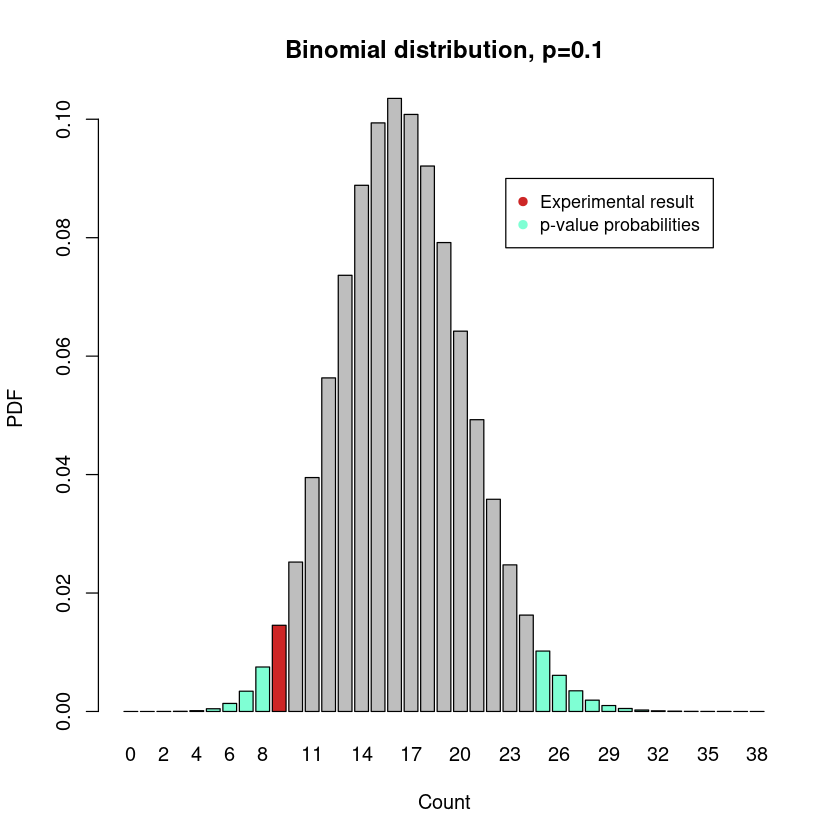

In [11]:
barplot(dbinom(seq(0,38,1),165,0.1), name = seq(0,38,1), col = c(rep("aquamarine",9),"firebrick3",rep("grey",15),rep("aquamarine",6)), xlab = "Count",ylab="PDF", main="Binomial distribution, p=0.1")

legend(28,0.09,legend=c("Experimental result","p-value probabilities"),
       col=c("firebrick3", "aquamarine"), lty=c(0,0), cex = 0.9, pch= c(19,19))